In [1]:
import cupy
import cudf
import cuml

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def draw(X, n_clusters, centers, pred):
    plt.clf()
    plt.cla()
    xp = cupy.get_array_module(X)
    for i in range(n_clusters):
        labels = X[pred == i]
        if xp == cupy:
            labels = labels.get()
        plt.scatter(labels[:, 0], labels[:, 1], c=np.random.rand(3))
    if xp == cupy:
        centers = centers.get()
    plt.scatter(centers[:, 0], centers[:, 1], s=120, marker='s',
                facecolors='y', edgecolors='k')

In [3]:
# Input data preparation
n_clusters = 2
num = 5000000

samples = np.random.randn(num, 2)
X_train = np.r_[samples + 1, samples - 1]

In [4]:
# Create CuPy ndarray
X_cp = cupy.asarray(X_train, dtype=np.float, order='F')

# Convert to cuDF DataFrame
X_df = cudf.DataFrame(
    [(str(i), cudf.from_dlpack(xi.toDlpack()))
     for i, xi in enumerate(X_cp.T)])

/home/shunta/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/cudf-0.7.1+62.g68799376-py3.6-linux-x86_64.egg/cudf/io/dlpack.py:36: UserWarning: WARNING: cuDF from_dlpack() assumes column-major (Fortran order) input. If the input tensor is row-major, transpose it before passing it to this function.
  res, valids = cpp_dlpack.from_dlpack(pycapsule_obj)


In [5]:
from cuml import KMeans

kmeans = KMeans(n_clusters=2, max_iter=10, n_gpu=1)
pred = kmeans.fit_predict(X_df).to_array()
centers = kmeans.cluster_centers_.as_matrix()

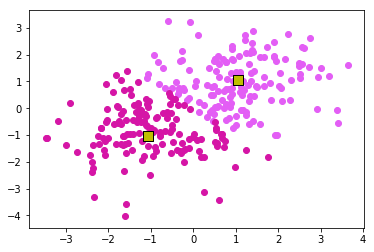

In [6]:
index = np.random.choice(10000000, 300, replace=False)
draw(X_train[index], n_clusters, centers, pred[index])